In [30]:
from MEFF_PPMI_function import *

import tensorflow as tf
import edward as ed
from edward.models import Bernoulli, Normal, Multinomial, Categorical, Mixture

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
print(tf.__version__)

1.6.0


### 1. Import real data

#### 1.1 For ordinal outcomes

In [3]:
K0 = [] # outcome dimensions
gatherInd0 = [] # number of repeated measurements
X_std0 = [] # subject covariates
t_mat0 = [] # measurement age
Y0_dat = [] # outcome measurements
data0 = [] # original data
colnames0 = [] # marker names

In [47]:
# Examples of ordinal data
data = pd.read_csv('../data/cat_scopa.csv').iloc[:,1:] 
data[:10]

,PATNO,EVENT_ID,SCAU1,SCAU2,SCAU3,SCAU4,SCAU5,SCAU6,SCAU7,SCAU8,...,SCAU16,SCAU17,SCAU18,SCAU19,SCAU20,SCAU21,age,GENDER,APPRDX,bl_age
0,3000,BL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,69.22,1,2,69.22
1,3000,V04,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,70.30,1,2,69.22
2,3000,V06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,71.22,1,2,69.22
3,3000,V08,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,72.30,1,2,69.22
4,3000,V10,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,73.30,1,2,69.22
5,3000,V12,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,74.38,1,2,69.22
6,3000,V14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,76.22,1,2,69.22
7,3000,V15,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,77.30,1,2,69.22
8,3001,BL,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,65.21,2,1,65.21
9,3001,V02,0,0,0,0,0,1,0,2,...,0,0,0,0,0,1,65.62,2,1,65.21


In [4]:
data = pd.read_csv('../data/cat_motor.csv').iloc[:,1:] 
colnames_motor = ["NP1SLPN","NP1SLPD","NP1PAIN","NP1URIN","NP1CNST","NP1FATG",
                  "NP2SPCH","NP2SALV","NP2HWRT","NP2HOBB","NP2TRMR",
                  "NP3RIGN","NP3FACXP","NP3RIGRU","NP3RIGLU","PN3RIGRL","NP3RIGLL","NP3FTAPR","NP3FTAPL","NP3HMOVR","NP3HMOVL",
                  "NP3PRSPR","NP3PRSPL","NP3TTAPR","NP3TTAPL","NP3LGAGL","NP3POSTR","NP3BRADY","NP3RTARU","NP3RTCON"]
colnames0.append(colnames_motor)
motor, gatherInd0_tmp, X_std0_tmp, t_mat0_tmp, data = preprocess(data, colnames_motor, continuous = False)
# combine the last two categories
motor[motor==4] = 3
K0.append(len(colnames_motor))
gatherInd0.append(gatherInd0_tmp)
X_std0.append(X_std0_tmp)
t_mat0.append(t_mat0_tmp)
Y0_dat.append(motor)
data0.append(data)

data = pd.read_csv('../data/cat_scopa.csv').iloc[:,1:] 
colnames_scopa = ['SCAU1','SCAU2','SCAU3','SCAU4','SCAU5','SCAU6','SCAU7','SCAU8','SCAU9','SCAU10','SCAU11',
                  'SCAU12', 'SCAU13', 'SCAU14', 'SCAU15', 'SCAU16', 'SCAU17', 'SCAU18','SCAU19', 'SCAU20', 'SCAU21']
colnames0.append(colnames_scopa)
scopa, gatherInd0_tmp, X_std0_tmp, t_mat0_tmp, data = preprocess(data, colnames_scopa, continuous = False)
K0.append(len(colnames_scopa))
gatherInd0.append(gatherInd0_tmp)
X_std0.append(X_std0_tmp)
t_mat0.append(t_mat0_tmp)
Y0_dat.append(scopa)
data0.append(data)

#### 1.2 For continuous outcomes

In [5]:
K1 = []; gatherInd1 = []; X_std1 = []; t_mat1 = []; Y1_dat = []; data1 = []; colnames1 = []

In [46]:
# Examples of continuous data
data = pd.read_csv('../data/cont_semantic.csv').iloc[:,1:] 
data[:10]

,PATNO,EVENT_ID,VLTTOT,VLTFRUIT,VLTVEG,VLTANIM,age,GENDER,APPRDX,bl_age
0,3000,BL,65,22,15,28,69.22,1,2,69.22
1,3000,V04,59,18,19,22,70.30,1,2,69.22
2,3000,V06,63,15,25,23,71.22,1,2,69.22
3,3000,V08,69,22,17,30,72.30,1,2,69.22
4,3000,V10,59,12,21,26,73.30,1,2,69.22
5,3000,V12,55,15,18,22,74.38,1,2,69.22
6,3000,V14,60,16,17,27,76.22,1,2,69.22
7,3001,BL,42,12,11,19,65.21,2,1,65.21
8,3001,V04,54,12,15,27,66.21,2,1,65.21
9,3001,V06,50,17,15,18,67.38,2,1,65.21


In [6]:
data = pd.read_csv('../data/cont_semantic.csv').iloc[:,1:] 
colnames = ['VLTTOT','VLTFRUIT','VLTVEG','VLTANIM']
colnames1.append(colnames)
semantic, gatherInd, X_std, t_mat, data = preprocess(data, colnames)
K1.append(len(colnames))
gatherInd1.append(gatherInd)
X_std1.append(X_std)
t_mat1.append(t_mat)
Y1_dat.append(semantic)
data1.append(data)

data = pd.read_csv('../data/cont_moca.csv').iloc[:,1:] 
colnames = ['MCATOT','visuospatial','attention','language','delayed_recall','orientation']
colnames1.append(colnames)
naming, gatherInd, X_std, t_mat, data = preprocess(data, colnames)
K1.append(len(colnames))
gatherInd1.append(gatherInd)
X_std1.append(X_std)
t_mat1.append(t_mat)
Y1_dat.append(naming)
data1.append(data)

data = pd.read_csv('../data/cont_CSF.csv').iloc[:,1:] 
data[['ABeta','alphasyn','ptau','ttau']] = np.log(data[['ABeta','alphasyn','ptau','ttau']])
colnames = ['ABeta','alphasyn','ptau','ttau']
colnames1.append(colnames)
csf, gatherInd, X_std, t_mat, data = preprocess(data, colnames)
K1.append(len(colnames))
gatherInd1.append(gatherInd)
X_std1.append(X_std)
t_mat1.append(t_mat)
Y1_dat.append(csf)
data1.append(data)

data = pd.read_csv('../data/cont_dat_sbr.csv').iloc[:,1:] 
colnames = ['CAUDATE_R', 'CAUDATE_L','PUTAMEN_R','PUTAMEN_L']
colnames1.append(colnames)
sbr, gatherInd, X_std, t_mat, data = preprocess(data, colnames)
K1.append(len(colnames))
gatherInd1.append(gatherInd)
X_std1.append(X_std)
t_mat1.append(t_mat)
Y1_dat.append(sbr)
data1.append(data)

In [7]:
# get all patient id (joinpid) by union all data sets
datalist = data0 + data1
joinpid = set(datalist[0].PATNO)
            
for i in range(1,len(datalist)):
    joinpid = joinpid.union(set(datalist[i].PATNO))
               
joinpid = np.sort(np.array(list(joinpid)))
len(joinpid)

2131

### 2. Build and train model in Edward

In [8]:
p1 = 2 # dimensions for eta
p2 = p1-1 # dimensions for theta
C = 4 # number of categories for ordinal variables
L = 3 # number of shared latent factors
Lsub = [1]*(len(K0)+len(K1)) # number of unique latent factors (specific to each modality)
N = len(joinpid) # number of patients

In [9]:
u_tot, datadict, param_list = Model_building(L, Lsub, N, K0, K1, joinpid, data0, data1, gatherInd0, gatherInd1, t_mat0, t_mat1, X_std0, X_std1, Y0_dat, Y1_dat, b0posind=6, p1=2, C=4)

q_u_tot = Normal(loc=tf.get_variable("qu_tot/loc", [N, L+sum(Lsub)]),
            scale=tf.nn.softplus(tf.get_variable("qu_tot/scale", [N, L+sum(Lsub)])))

In [10]:
# variational inference using Edward
inference = KLqp_customized({u_tot: q_u_tot}, data=datadict)

inference.initialize(L=L, sumsubL = sum(Lsub), n_iter=3000, n_print=100, n_samples=10)
init = tf.global_variables_initializer()
init.run()

/Users/qinxiawang/opt/anaconda3/envs/project2/lib/python3.5/site-packages/edward/util/random_variables.py:48: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \
/Users/qinxiawang/opt/anaconda3/envs/project2/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/qinxiawang/opt/anaconda3/envs/project2/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/qinxiawang/opt/anaconda3/

In [11]:
# converge criterion: when loss does not decrease for 10 iterations
min_loss = np.infty
learning_curve = []
cum_iter = 0
n_iter = 0
while cum_iter <= 10:
    info_dict = inference.update()
    if n_iter %100 == 0:
        print(info_dict, cum_iter)
        if info_dict['loss'] < min_loss:
            min_loss = info_dict['loss']
            cum_iter = 0
        else:
            cum_iter += 1
    learning_curve.append(info_dict['loss'])
    n_iter += 1

{'loss': 683420.1, 't': 1} 0
{'loss': 449337.16, 't': 101} 0
{'loss': 429777.16, 't': 201} 0
{'loss': 426768.47, 't': 301} 0
{'loss': 424540.06, 't': 401} 0
{'loss': 423389.25, 't': 501} 0
{'loss': 422661.8, 't': 601} 0
{'loss': 422159.4, 't': 701} 0
{'loss': 421767.56, 't': 801} 0
{'loss': 421284.2, 't': 901} 0
{'loss': 420817.34, 't': 1001} 0
{'loss': 420469.06, 't': 1101} 0
{'loss': 420300.88, 't': 1201} 0
{'loss': 420074.84, 't': 1301} 0
{'loss': 419924.9, 't': 1401} 0
{'loss': 419786.66, 't': 1501} 0
{'loss': 419750.72, 't': 1601} 0
{'loss': 419395.06, 't': 1701} 0
{'loss': 419308.88, 't': 1801} 0
{'loss': 419162.3, 't': 1901} 0
{'loss': 418975.75, 't': 2001} 0
{'loss': 419125.3, 't': 2101} 0
{'loss': 418761.53, 't': 2201} 1
{'loss': 418962.72, 't': 2301} 0
{'loss': 418727.6, 't': 2401} 1
{'loss': 418740.7, 't': 2501} 0
{'loss': 418555.88, 't': 2601} 1
{'loss': 418477.56, 't': 2701} 0
{'loss': 418470.16, 't': 2801} 0
{'loss': 418362.3, 't': 2901} 0
{'loss': 418467.97, 't': 3001} 0

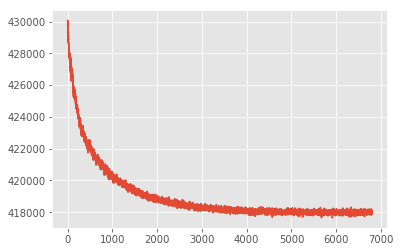

In [15]:
plt.plot(learning_curve[200:])
plt.show()

### 3. Estimated parameters

In [16]:
param_dict = {}
param_dict["W"] = param_list['W'].eval()
param_dict["u"] = q_u_tot.mean().eval()

if len(K0) > 0:
    for i in range(len(K0)):
        param_dict["theta0"+str(i+1)] = param_list["theta0"][i].eval()
        param_dict["mu0"+str(i+1)] = param_list["mu0"][i].eval()
        param_dict["b0"+str(i+1)] = param_list["b0"][i].eval()
        param_dict["eta0"+str(i+1)] = param_list["eta0"][i].eval()
        param_dict["delta2"+str(i+1)] = param_list["delta2"][i].eval()
        param_dict["delta3"+str(i+1)] = param_list["delta3"][i].eval()
    
if len(K1) > 0:
    for i in range(len(K1)):
        param_dict["eta1"+str(i+1)] = param_list["eta1"][i].eval()
        param_dict["b1"+str(i+1)] = param_list["b1"][i].eval()
        param_dict["mu1"+str(i+1)] = param_list["mu1"][i].eval()
        param_dict["theta1"+str(i+1)] = param_list["theta1"][i].eval()
        param_dict["beta0"+str(i+1)] = param_list["beta0"][i].eval()
        param_dict["beta1"+str(i+1)] = param_list["beta1"][i].eval()
        param_dict["sigma_ek"+str(i+1)] = param_list["sigma_ek"][i].eval()
        param_dict["aest"+str(i+1)] = param_list["aest"][i].eval()
        
param_dict["loss"] = np.array(learning_curve)

In [18]:
u_pred = np.array(param_dict['u'])
W_pred = np.array(param_dict['W'])

y_pred = pd.DataFrame(u_pred @ W_pred.T)

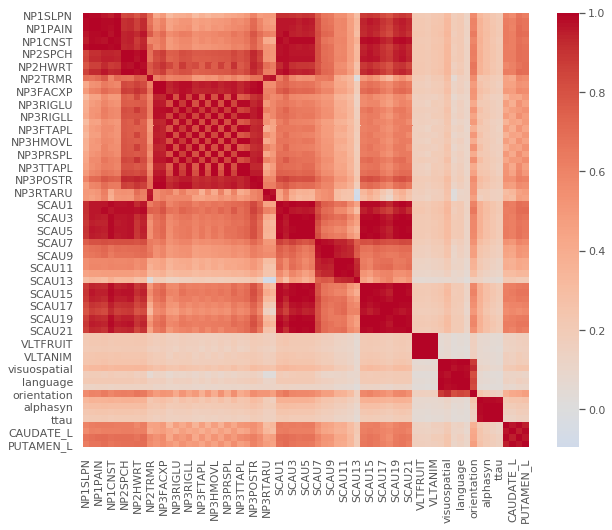

In [41]:
# correlation heat map from fitted outcomes
fig, ax = plt.subplots(figsize=(10,8))
y_pred = pd.DataFrame(y_pred)
y_pred.columns = [item for i in colnames0 for item in i] + [item for i in colnames1 for item in i]
ycorr = y_pred.corr()
sns.heatmap(ycorr,cmap='coolwarm', center=0)